In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
scaler = RobustScaler()

In [2]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))
train.drop("type",axis = 1,inplace=True)
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281,8.877339
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138,4.624156
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196,0.000000
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774,6.000000
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997,8.000000
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554,11.000000
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172,18.000000


In [3]:
train_yk = train[["type_num","fiberID"]]
train1 = train.drop(["type_num","fiberID"],axis=1)
feature_col = train1.columns
train_k = train1[train1[feature_col] < -3000]
train_k1 = train1[train1[feature_col] > 1000]
pre_index1 = set(train_k.dropna(how="all",axis=0).index)
pre_index2 = set(train_k1.dropna(how="all",axis=0).index)
pre_index = list(pre_index1|pre_index2)
train1 = train1.drop(pre_index,axis=0).reset_index(drop=True)
train_yk = train_yk.drop(pre_index,axis=0).reset_index(drop=True)
train = pd.concat([train_yk,train1[feature_col]],axis=1)
train.describe()

,type_num,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,...,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000,199961.000000
mean,8.877386,360.835453,20.984809,19.863223,19.280856,18.877075,18.612496,21.175120,20.089969,19.505003,...,20.709374,19.592834,19.001273,18.603487,18.405561,20.732513,19.532383,18.940854,18.521157,18.277713
std,4.624172,225.312297,2.879893,2.301657,2.647863,2.102330,1.764674,2.180940,1.846938,1.708515,...,5.184125,5.222059,7.707273,2.755425,5.009142,2.188580,1.964419,1.862421,1.798753,1.869048
min,0.000000,1.000000,-501.529124,-335.608609,-619.353582,-30.711890,-106.927107,-68.798881,-8.294703,-14.662435,...,-1131.081339,-1581.627834,-2998.277036,-654.195115,-789.601838,3.444448,8.686690,5.781584,5.004407,4.460086
25%,6.000000,174.000000,19.652900,18.701826,18.048916,17.748122,17.425886,19.941176,18.903412,18.259624,...,19.248125,18.114249,17.480168,17.050727,16.805081,19.266446,18.076413,17.423702,16.977844,16.705951
50%,8.000000,349.000000,20.871475,19.904295,19.454579,19.044094,18.611941,21.049322,20.069257,19.631853,...,20.366919,19.586778,19.182990,18.693748,18.174806,20.406920,19.547798,19.143344,18.641862,18.101192
75%,11.000000,526.000000,22.160381,21.150391,20.515942,20.073678,19.883806,22.337744,21.386006,20.773954,...,21.797459,21.004393,20.457461,20.019139,19.807617,21.992889,20.962267,20.408121,19.968855,19.819559
max,18.000000,1000.000000,368.939515,478.440761,117.565177,585.370349,115.830481,274.083693,68.509385,32.574603,...,667.792296,773.346459,809.628220,219.701423,907.434571,49.487277,66.589958,35.102312,45.783550,61.597879


In [4]:
train2 = train[["fiberID","type_num"]]
train2["count"] =1
train2_g = train2.groupby(["fiberID","type_num"]).count().unstack("type_num")
train2_g.fillna(str(0),inplace=True)
for i in range(train2_g.shape[0]):
    for j in range(train2_g.shape[1]):
        if train2_g.iloc[i,j]!="0":
            train2_g.iloc[i,j] = str(1)
train2_g["code"] = ""
train2_g["code"] = train2_g.apply(lambda x: ''.join(x), axis=1)
train2_g = train2_g["code"].reset_index()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
train = train.reset_index().merge(train2_g,on="fiberID").set_index("index").sort_index().drop("fiberID",axis=1)
test = test.reset_index().merge(train2_g,on="fiberID").set_index("id").sort_index().drop("fiberID",axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["code"] = encoder.fit_transform(train["code"])
test["code"] = encoder.transform(test["code"])

In [7]:
train_x = train.drop('type_num', axis=1)
train_y = train['type_num']
test_x = test
set_data = pd.concat([train_x,test_x],axis=0)

In [8]:
train_x.shape

(199961, 21)

In [9]:
set_du = pd.get_dummies(set_data["code"], prefix="code")
set_data.drop("code",axis=1,inplace=True)
set_data1 = pd.concat([set_data,set_du],axis=1)
train_x = set_data1.iloc[:199961,:]
test_x = set_data1.iloc[199961:,:]

In [10]:
sc_col = train_x.iloc[:,:20].columns
not_col = train_x.columns.difference(sc_col)
tr_ind =  train_x.index
te_ind = test_x.index

In [11]:
train_x_sc = scaler.fit_transform(train_x[sc_col])
test_x_sc = scaler.transform(test_x[sc_col])
train_x_sc =  pd.DataFrame(train_x_sc,columns = sc_col,index = tr_ind)
test_x_sc =  pd.DataFrame(test_x_sc,columns = sc_col,index = te_ind)

In [12]:
train_x = pd.concat([train_x_sc,train_x[not_col]],axis=1)
test_x = pd.concat([test_x_sc,test_x[not_col]],axis=1)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size=0.2, random_state=42)

for train_index, test_index in split.split(train_x, train_y):
    x_train, y_train = train_x.loc[train_index], train_y[train_index]
    x_val, y_val = train_x.loc[test_index] , train_y[test_index]

In [16]:
print(x_val.shape)
print(test_x.shape)

(39990, 55)
(10009, 55)


In [15]:
from sklearn.decomposition import PCA
pca = PCA()
# train_x = set_data1.iloc[:199961,:]
# test_x = set_data1.iloc[199961:,:]

In [17]:
# train_x_pc = pca.fit_transform(train_x[sc_col])
# test_x_pc = pca.transform(test_x[sc_col])
# train_x_pc =  pd.DataFrame(train_x_pc, index = tr_ind)
# test_x_pc =  pd.DataFrame(test_x_pc,index = te_ind)
set_sc = pca.fit_transform(set_data1[sc_col])
set_sc =  pd.DataFrame(set_sc,columns = sc_col,index = set_data1.index)
set_data2 = pd.concat([set_sc,set_data1[not_col]],axis=1)
train_x = set_data2.iloc[:199961,:]
test_x = set_data2.iloc[199961:,:]

In [18]:
# train_x = pd.concat([train_x_pc,train_x[not_col]],axis=1)
# test_x = pd.concat([test_x_pc,test_x[not_col]],axis=1)
split = StratifiedShuffleSplit(test_size=0.2, random_state=42)

for train_index, test_index in split.split(train_x, train_y):
    x_train, y_train = train_x.loc[train_index], train_y[train_index]
    x_val, y_val = train_x.loc[test_index] , train_y[test_index]

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(train_x.iloc[:,i])

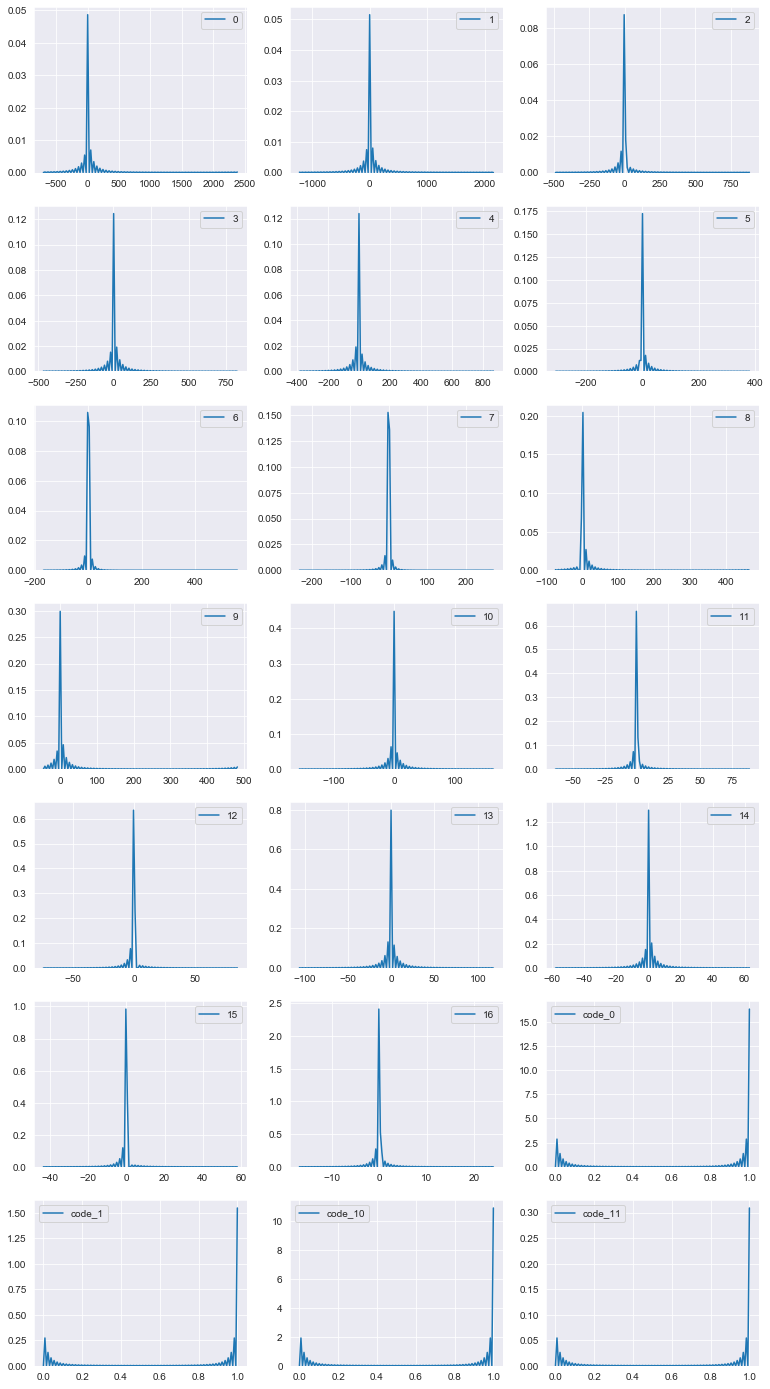

In [36]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(train_x.iloc[:,i])

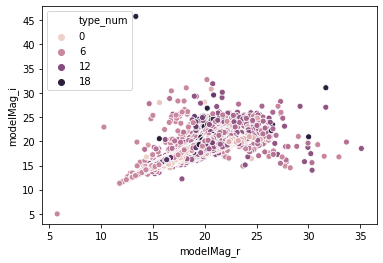

In [27]:
sns.scatterplot(train["modelMag_r"],train["modelMag_i"],hue="type_num", data=train)

In [19]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-1, learning_rate=0.003, n_estimators=6000, subsample_for_bin=400000, objective='multiclass', min_split_gain=0.3, min_child_weight=3e-2, min_child_samples=15,n_jobs=-1, random_state=42)
lgb_model = lgb_clf.fit(x_train,y_train)

In [20]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()
y_en = encoder1.fit_transform(np.array(y_val).reshape(-1,1))

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
y_preds = lgb_model.predict_proba(x_val)

In [22]:
log_loss(y_en.toarray(),y_preds)

0.35707753921598756

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000,
                          max_depth=25,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rf_clf.fit(x_train, y_train)

In [ ]:
y_preds = rf_clf.predict_proba(x_val)
log_loss(y_en.toarray(),y_preds)

In [33]:
from sklearn.externals import joblib
joblib.dump(lgb_model,'lgb.pkl')
# load_model = joblib.load('pkl')

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lgb.pkl']

In [24]:
y_test = lgb_model.predict_proba(test_x)

In [26]:
submission = pd.DataFrame(data=y_test, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission2.csv', index=True)


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=500,
                          max_depth=15,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [35]:
import scipy as sp
# obs = train[["fiberID", "type_num"]]
# obs["count"] = 1
# obs = obs.groupby(["type","fiberID"]).sum().unstack("fiberID")
# obs.fillna(0,inplace=True)
# obs
# sp.stats.chi2_contingency(obs)

In [26]:
for i in range(train_x.shape[1]):
    print(sp.stats.mannwhitneyu(train_x.iloc[:,i],train_y))

MannwhitneyuResult(statistic=393659256.0, pvalue=0.0)
MannwhitneyuResult(statistic=324241431.0, pvalue=0.0)
MannwhitneyuResult(statistic=263435598.0, pvalue=0.0)
MannwhitneyuResult(statistic=284864613.0, pvalue=0.0)
MannwhitneyuResult(statistic=302448608.0, pvalue=0.0)
MannwhitneyuResult(statistic=386563225.0, pvalue=0.0)
MannwhitneyuResult(statistic=327350637.0, pvalue=0.0)
MannwhitneyuResult(statistic=267850258.0, pvalue=0.0)
MannwhitneyuResult(statistic=286956101.0, pvalue=0.0)
MannwhitneyuResult(statistic=312540632.0, pvalue=0.0)
MannwhitneyuResult(statistic=430877470.0, pvalue=0.0)
MannwhitneyuResult(statistic=313713279.0, pvalue=0.0)
MannwhitneyuResult(statistic=260364902.0, pvalue=0.0)
MannwhitneyuResult(statistic=271478912.0, pvalue=0.0)
MannwhitneyuResult(statistic=318645513.0, pvalue=0.0)
MannwhitneyuResult(statistic=406347501.0, pvalue=0.0)
MannwhitneyuResult(statistic=299587401.0, pvalue=0.0)
MannwhitneyuResult(statistic=241889031.0, pvalue=0.0)
MannwhitneyuResult(statistic

In [36]:
sp.stats.ks_2samp(train_x.iloc[:,1], train_x.iloc[:,2])

Ks_2sampResult(statistic=0.04853946519571317, pvalue=4.948289962369481e-205)